In [119]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
matplotlib.rcParams['figure.figsize'] = (10,6)

In [120]:
import pandas as pd
df=pd.read_csv("D:\\data\\bhk.csv")
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [121]:
df.shape,df.dtypes

((13320, 7),
 area_type      object
 location       object
 size           object
 total_sqft     object
 bath          float64
 balcony       float64
 price         float64
 dtype: object)

In [122]:
df1=df[~df['size'].isnull()]

In [123]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [124]:
df1[~df1['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Devanahalli,1 BHK,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135


In [125]:
def find_avg(x):
    num=x.split('-')
    if len(num)==2:
        avg=(float(num[0])+float(num[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None
    

In [126]:
df1['total_sqft']=df1['total_sqft'].apply(find_avg)

C:\Users\user\AppData\Local\Temp/ipykernel_5984/1315930670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft']=df1['total_sqft'].apply(find_avg)


In [127]:
df3=df1.copy()

In [128]:
df3['price_persqft']=(df3['price']/df3['total_sqft'])*100000

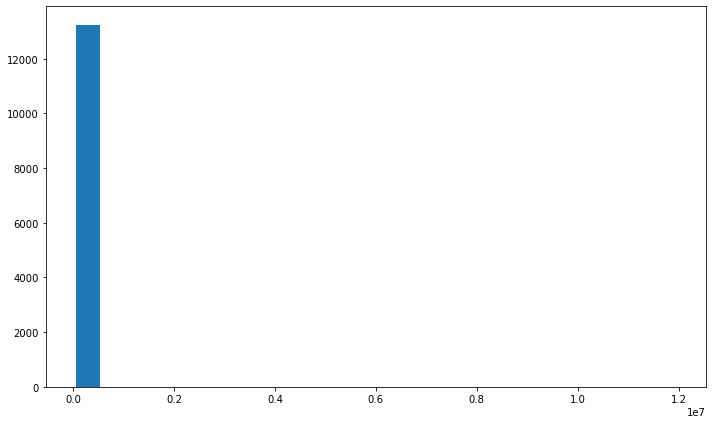

<Figure size 720x432 with 0 Axes>

In [129]:
plt.hist(df3.price_persqft,rwidth=.8,bins=20)
fig = plt.figure()
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
x = np.linspace(-2, 2, 10)
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

In [130]:
minthreshold,maxthreshold=df3['price_persqft'].quantile([.001,.999])

minthreshold,maxthreshold

(1367.6645768025078, 50915.41569541738)

In [131]:
upper_limit=df3['price_persqft'].mean()+(4*df3['price_persqft'].std())
upper_limit

433886.97757169185

In [132]:
lower_limit=df3['price_persqft'].mean()-(4*df3['price_persqft'].std())
lower_limit

-418061.70952636853

In [133]:
df4=df3[(df3['price_persqft']<upper_limit)&(df3['price_persqft']>lower_limit)]

In [134]:
df4.shape

(13254, 8)

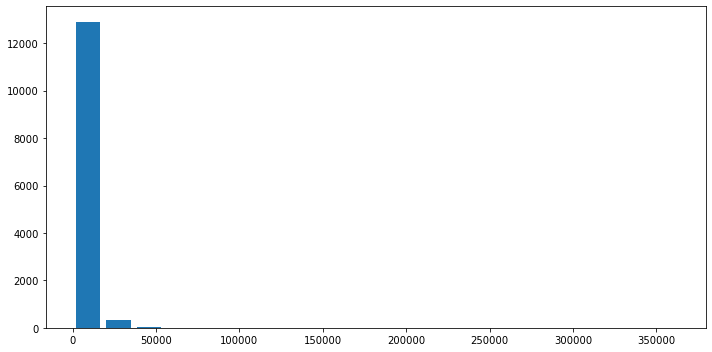

<Figure size 720x360 with 0 Axes>

In [152]:
plt.hist(df4.price_persqft,rwidth=.8,bins=20)
fig = plt.figure()
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.autolayout"] = True
#x = np.linspace(-2, 2, 10)
#spacing = 0.100
#fig.subplots_adjust(bottom=spacing)
plt.show()

In [136]:
df4.price_persqft.describe()

count     13254.000000
mean       6738.190327
std        5769.905258
min         267.829813
25%        4270.378537
50%        5436.292758
75%        7311.343022
max      363333.333333
Name: price_persqft, dtype: float64

In [137]:
df3.price_persqft.describe()

count    1.325800e+04
mean     7.912634e+03
std      1.064936e+05
min      2.678298e+02
25%      4.271229e+03
50%      5.438331e+03
75%      7.313266e+03
max      1.200000e+07
Name: price_persqft, dtype: float64

In [138]:
df5=df4.copy()

In [139]:
df5['zscore']=(df5.price_persqft-df5.price_persqft.mean())/df5.price_persqft.std()

In [140]:
df5.sample(10)

,area_type,location,size,total_sqft,bath,balcony,price,price_persqft,zscore
4013,Built-up Area,Frazer Town,3 BHK,1900.0,4.0,2.0,145.00,7631.578947,0.154836
9772,Super built-up Area,Cooke Town,3 BHK,2560.0,4.0,NaN,310.00,12109.375000,0.930897
12283,Super built-up Area,Kanakpura Road,3 BHK,1450.0,3.0,3.0,53.60,3696.551724,-0.527156
2931,Built-up Area,Basavangudi,4 Bedroom,2500.0,4.0,1.0,150.00,6000.000000,-0.127938
48,Plot Area,KR Puram,2 Bedroom,800.0,1.0,1.0,130.00,16250.000000,1.648521
8242,Super built-up Area,Alur,1 BHK,425.0,1.0,1.0,15.00,3529.411765,-0.556123
9978,Plot Area,Kattigenahalli,2 Bedroom,1200.0,1.0,0.0,70.00,5833.333333,-0.156824
3462,Super built-up Area,Kathriguppe,3 BHK,1350.0,2.0,1.0,87.01,6445.185185,-0.050782
8211,Super built-up Area,Devanahalli,3 BHK,1466.0,3.0,3.0,77.59,5292.633015,-0.250534
5630,Super built-up Area,Anantapura,2 BHK,1200.0,2.0,2.0,37.00,3083.333333,-0.633434


In [141]:
df6=df5[(df5['zscore']<4 )& (df5['zscore']>-4)]
df6

,area_type,location,size,total_sqft,bath,balcony,price,price_persqft,zscore
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,-0.526591
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,-0.367910
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,-0.421607
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,-0.085322
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,-0.431236
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,6689.834926,-0.008381
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,NaN,400.00,11111.111111,0.757884
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,5258.545136,-0.256442
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,10407.336319,0.635911


In [142]:
df6.price_persqft.describe()

count    13209.000000
mean      6577.456263
std       3842.051914
min        267.829813
25%       4265.734266
50%       5421.184320
75%       7274.490786
max      29629.629630
Name: price_persqft, dtype: float64

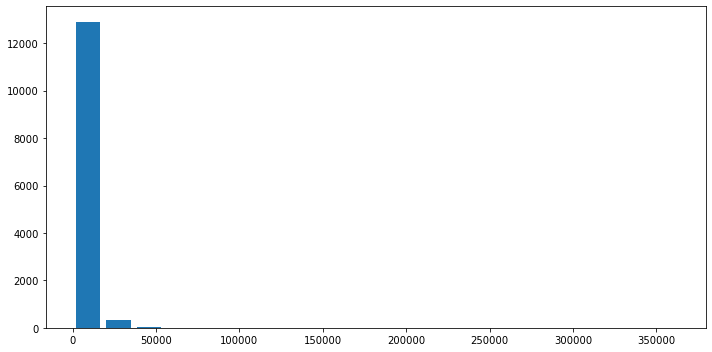

<Figure size 720x360 with 0 Axes>

In [153]:
plt.hist(df4.price_persqft,rwidth=.8,bins=20)
fig = plt.figure()
#plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.autolayout"] = True
#x = np.linspace(-2, 2, 10)
#spacing = 0.100
#fig.subplots_adjust(bottom=spacing)
plt.show()

In [144]:
minthreshold,maxthreshold=df6['price_persqft'].quantile([.001,.999])

minthreshold,maxthreshold

(1366.896551724138, 28465.333333333543)

In [145]:
upper_limit=df6['price_persqft'].mean()+(4*df6['price_persqft'].std())
upper_limit

21945.663919284794

In [146]:
lower_limit=df6['price_persqft'].mean()-(4*df6['price_persqft'].std())
lower_limit

-8790.751392583252

In [147]:
df7=df6[(df6['price_persqft']<upper_limit)&(df6['price_persqft']>lower_limit)]

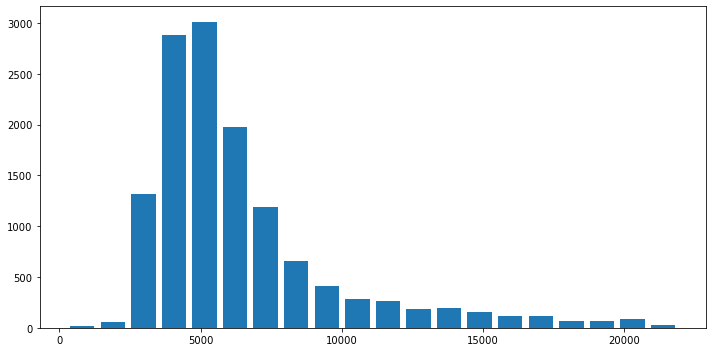

<Figure size 720x360 with 0 Axes>

In [154]:
plt.hist(df7.price_persqft,rwidth=.8,bins=20)
fig = plt.figure()
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.autolayout"] = True
#x = np.linspace(-2, 2, 10)
#spacing = 0.100
#fig.subplots_adjust(bottom=spacing)
plt.show()